In [85]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

In [86]:
#para cada bin temporal tengo una distribucion de probabilidad poissoneana
numbins = 100000
photons = np.tile(1,numbins) #np.random.poisson(lam=1, size=numbins)
photons2 = np.tile(1,numbins) #np.random.poisson(lam=1, size=numbins)
det_input = np.array([np.random.binomial(i, 0.5) for i in photons])
window = 10
det_output = np.zeros(numbins//window)
for i in range(numbins//window): det_output[i] = np.sum(det_input[i*window:(i+1)*window])

print(photons)
print(det_input)
print(det_output)

[1 1 1 ... 1 1 1]
[1 1 0 ... 0 0 1]
[ 7.  6. 10. ...  6.  4.  4.]


In [87]:
mean_photons = np.mean(photons)
mean_detinput = np.mean(det_input)
mean_detoutput = np.mean(det_output)/window

var_photons = np.var(photons)
var_detinput = np.var(det_input)
var_detoutput = np.var(det_output)/window


print(f"Mean photons: {mean_photons}, Variance photons: {var_photons}")
print(f"Mean det_input: {mean_detinput}, Variance det_input: {var_detinput}")
print(f"Mean det_output: {mean_detoutput}, Variance det_output: {var_detoutput}")

Mean photons: 1.0, Variance photons: 0.0
Mean det_input: 0.50075, Variance det_input: 0.24999943749999998
Mean det_output: 0.50075, Variance det_output: 0.25144437500000005


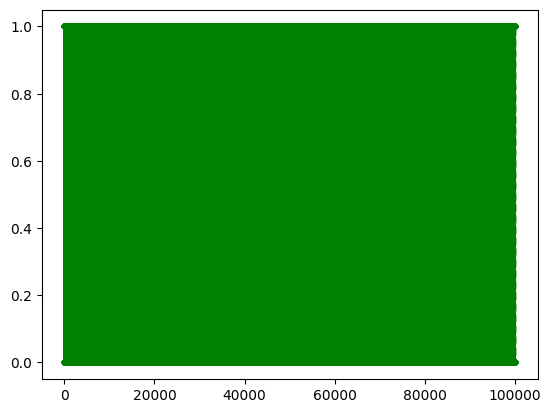

In [88]:
plt.plot(photons)
plt.plot(det_input, 'g.--')
plt.show()


In [89]:
#simulacion ruido
#El detector introduce ruido correspondiente a la corriente de oscuridad. Este tiene una distribucion poissoneana https://kth.diva-portal.org/smash/get/diva2:1679022/FULLTEXT01.pdf

lambda_dark = 0.0 #promedio de fotones generados por bin
dark_counts = np.random.poisson(lam=lambda_dark, size=numbins)
det_input_dark = det_input + dark_counts
det_output_dark = np.zeros(numbins//window)
for i in range(numbins//window): det_output_dark[i] = np.sum(det_input_dark[i*window:(i+1)*window])
mean_detinput_dark = np.mean(det_input_dark)
mean_detoutput_dark = np.mean(det_output_dark)/window
var_detinput_dark = np.var(det_input_dark)
var_detoutput_dark = np.var(det_output_dark)/window

print(f"Mean det_input_dark: {mean_detinput_dark}, Variance det_input_dark: {var_detinput_dark}")
print(f"Mean det_output_dark: {mean_detoutput_dark}, Variance det_output_dark: {var_detoutput_dark}")



Mean det_input_dark: 0.50075, Variance det_input_dark: 0.24999943749999998
Mean det_output_dark: 0.50075, Variance det_output_dark: 0.25144437500000005


In [90]:
#la serie temporal del otro detector esta dada por 
det_input2 = photons - det_input
dark_counts2 = np.random.poisson(lam=lambda_dark, size=numbins)
det2_input_dark = det_input2 + dark_counts2
det2_output_dark = np.zeros(numbins//window)
for i in range(numbins//window): det2_output_dark[i] = np.sum(det2_input_dark[i*window:(i+1)*window])
mean_det2input_dark = np.mean(det2_input_dark)
mean_det2output_dark = np.mean(det2_output_dark)/window
var_det2input_dark = np.var(det2_input_dark)
var_det2output_dark = np.var(det2_output_dark)/window

print(f"Mean det2_input_dark: {mean_det2input_dark}, Variance det2_input_dark: {var_det2input_dark}")
print(f"Mean det2_output_dark: {mean_det2output_dark}, Variance det2_output_dark: {var_det2output_dark}")


Mean det2_input_dark: 0.49925, Variance det2_input_dark: 0.24999943750000003
Mean det2_output_dark: 0.49924999999999997, Variance det2_output_dark: 0.25144437500000005


In [91]:
det_input

array([1, 1, 0, ..., 0, 0, 1], shape=(100000,))

In [92]:
#calculo g2
g2 = np.mean(det_output_dark*det2_output_dark)/(mean_detoutput_dark*mean_det2output_dark)/window**2
print(f"g2 = {g2}")

g2q = np.sum(det_output_dark*det2_output_dark)/(np.sum(det_output_dark)*np.sum(det2_output_dark))*numbins/window
print(f"g2q = {g2q}")


g2 = 0.8994220236995533
g2q = 0.8994220236995533


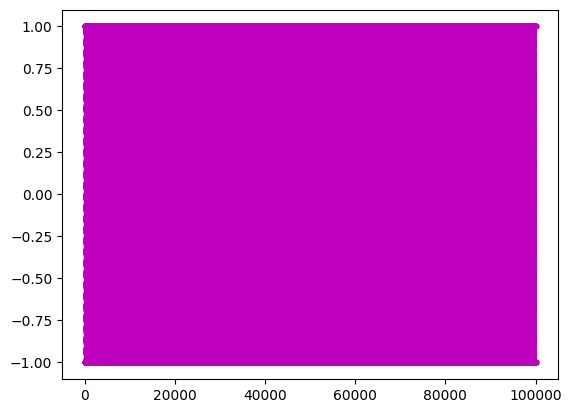

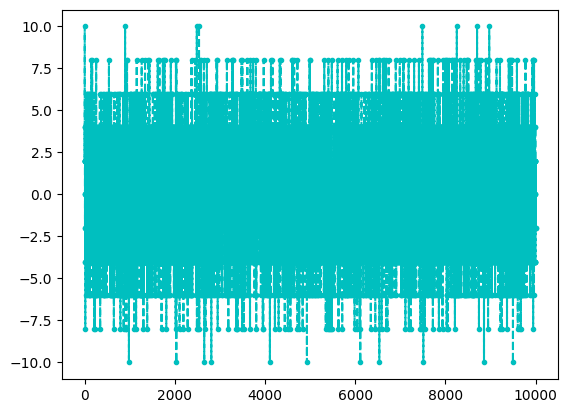

In [93]:
plt.plot(det_input-det_input2, 'm.--')
plt.figure()
plt.plot(det_output_dark-det2_output_dark ,'c.--')
plt.show()

In [ ]:
#calculo la covarianza entre los dos detectores
cov_detectors = np.cov(det_input, det_input_dark)[0][1]
print(f"Covarianza entre los dos detectores: {cov_detectors}")



Covarianza entre los dos detectores: 0.2500019375193751


np.float64(1666.5)

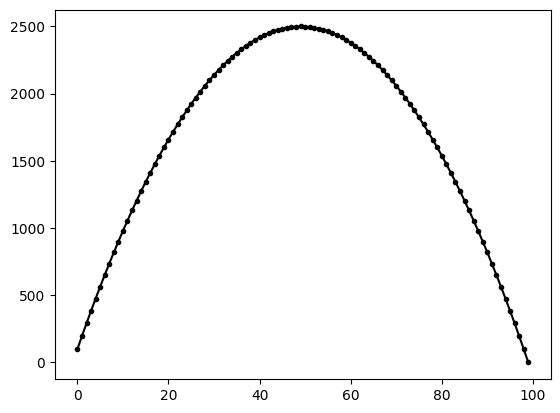

In [98]:
a = np.linspace (1,100,100)
b = 100 - a
plt.plot(a*b, 'k.-')

np.mean(a*b)